In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("features.csv", index_col=0)
df['Date'] = pd.date_range('01/01/2000', periods=df.shape[0])
df.set_index('Date', inplace=True, drop=True)

In [2]:
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,Target 1,Target 2
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.048742,1.102479,1.150992,0.963177,0.928969,0.890521,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.028460,1.058586,1.110203,0.957928,0.919253,0.896450,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.026610,1.054675,1.111816,0.953534,0.911195,0.890171,NaN,NaN


In [3]:
df.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,Target 1,Target 2
count,259.000000,259.000000,260.000000,260.000000,259.000000,259.000000,208.000000,208.000000,208.000000,208.000000,...,467.000000,467.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,517.000000,517.000000
mean,0.002278,0.001930,0.349438,0.650562,0.009954,0.002339,1.007568,1.006604,1.001500,0.999126,...,0.752112,1.693335,1.054201,1.121967,-1.197166,0.954766,0.915134,0.878141,0.003699,0.015608
std,0.092910,0.093167,0.036805,0.036805,0.161833,0.089401,0.121969,0.103017,0.062548,0.053722,...,0.187026,0.607209,0.047390,0.152628,54.124115,0.032401,0.054718,0.068041,0.066523,0.191358
min,-0.480226,-0.482138,0.245373,0.568265,-0.642701,-0.432821,0.728084,0.759569,0.840961,0.840961,...,0.341758,1.005336,1.006883,1.013861,-1233.000000,0.685962,0.522026,0.443405,-0.333333,-0.467135
25%,-0.019418,-0.022128,0.323769,0.624544,-0.074530,-0.032890,0.927269,0.943736,0.958527,0.958575,...,0.592939,1.269540,1.027695,1.056969,1.090066,0.944599,0.895014,0.848450,-0.030209,-0.081218
50%,0.001599,0.000403,0.351337,0.648663,0.005935,-0.000734,0.997372,1.006875,1.001561,0.996550,...,0.782477,1.510823,1.041799,1.087245,1.136735,0.962264,0.927273,0.892929,0.002247,0.004591
75%,0.021796,0.022361,0.375456,0.676231,0.082855,0.032550,1.080812,1.075984,1.043054,1.029195,...,0.926552,1.885462,1.064303,1.137444,1.223580,0.975509,0.952189,0.924575,0.037377,0.086314
max,0.540181,0.477924,0.431735,0.754627,0.813219,0.457108,1.412478,1.412478,1.168411,1.151026,...,1.000000,3.989691,1.514377,3.118421,5.814978,0.991402,0.982951,0.973767,0.258065,1.335546


In [4]:
len(df.index)

522

In [5]:
df.dtypes[df.dtypes != 'float64']

Series([], dtype: object)

In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

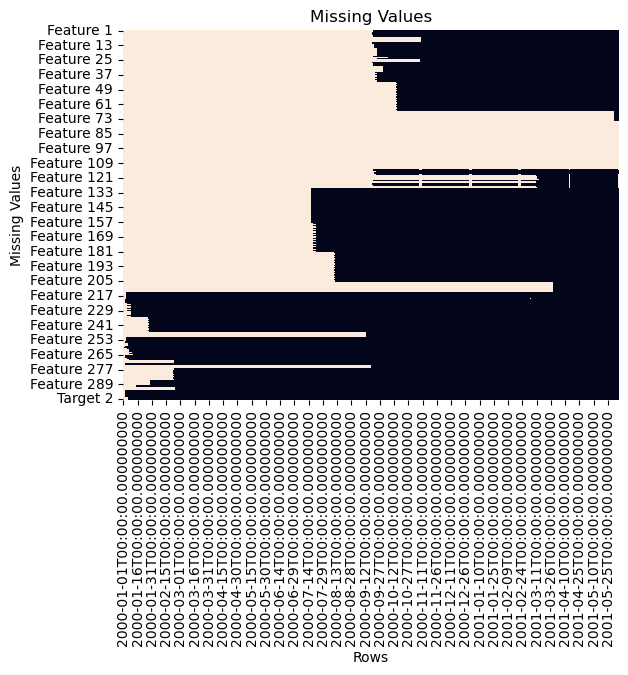

In [7]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Rows', fontsize = 10) 
plt.ylabel('Missing Values', fontsize = 10)
plt.show()

In [8]:
df = df.dropna(how='all', thresh=df.shape[1]*0.5)
df = df.dropna(how='all',thresh=df.shape[0]*0.05, axis=1)

In [9]:
df.shape

(299, 254)

In [10]:
df.isna().sum()

Feature 1      40
Feature 2      40
Feature 3      39
Feature 4      39
Feature 5      40
               ..
Feature 297     0
Feature 298     0
Feature 299     0
Target 1        0
Target 2        0
Length: 254, dtype: int64

In [11]:
df_target = df.iloc[1:, -2:]
print(df_target)
df_feature = df.iloc[:,:-2].shift(1)
df_feature.drop(index=df_feature.index[0],axis=0,inplace=True)

            Target 1  Target 2
Date                          
2000-08-12  0.037037 -0.001171
2000-08-13 -0.072464  0.055667
2000-08-14  0.037624 -0.359740
2000-08-15  0.000000 -0.112868
2000-08-16 -0.088346 -0.031302
...              ...       ...
2001-06-01  0.017346 -0.064209
2001-06-02 -0.011494  0.095432
2001-06-03 -0.036502  0.107279
2001-06-04  0.107098  0.125907
2001-06-05 -0.001869  0.011562

[298 rows x 2 columns]


In [13]:
print(df_feature)

            Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
Date                                                                           
2000-08-12        NaN        NaN        NaN        NaN        NaN        NaN   
2000-08-13        NaN        NaN        NaN        NaN        NaN        NaN   
2000-08-14        NaN        NaN        NaN        NaN        NaN        NaN   
2000-08-15        NaN        NaN        NaN        NaN        NaN        NaN   
2000-08-16        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2001-06-01   0.015067   0.019217   0.402969   0.597031   0.117947  -0.044295   
2001-06-02  -0.010680  -0.022057   0.342507   0.657493  -0.159120   0.089510   
2001-06-03   0.046431   0.048614   0.369707   0.630293   0.129534   0.003141   
2001-06-04  -0.001670  -0.005891   0.320944   0.679056  -0.133347   0.075567   
2001-06-05  -0.048827  -0.052168   0.308

In [14]:
imp = KNNImputer(n_neighbors = 3)
imputed = imp.fit_transform(df_feature)
df_feature = pd.DataFrame(imputed)

In [15]:
df_feature.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
247    0
248    0
249    0
250    0
251    0
Length: 252, dtype: int64

In [16]:
df_feature.describe()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.001695,0.001659,0.349876,0.650124,0.006819,0.003221,1.011958,1.008208,0.999650,0.998045,...,0.880350,1.252151,0.830417,1.822229,1.048448,1.103905,1.165936,0.958330,0.920937,0.885426
std,0.083104,0.083359,0.034081,0.034081,0.149928,0.079876,0.107230,0.088449,0.054439,0.046207,...,0.105593,0.171617,0.135622,0.659126,0.029223,0.067934,0.119461,0.023541,0.041935,0.053031
min,-0.462874,-0.467475,0.253257,0.568265,-0.642701,-0.343448,0.728084,0.759569,0.840961,0.840961,...,0.569942,1.002193,0.468427,1.020147,1.006883,1.013861,1.024300,0.813773,0.686019,0.615788
25%,-0.020773,-0.023011,0.330802,0.626741,-0.069832,-0.031444,0.942476,0.961438,0.967169,0.968803,...,0.821752,1.114802,0.736027,1.339650,1.027768,1.057121,1.093070,0.947310,0.899895,0.857763
50%,-0.000094,-0.000358,0.352467,0.647533,-0.003034,-0.000150,1.005675,1.012598,0.999816,0.994242,...,0.917223,1.215328,0.865047,1.661589,1.041269,1.086092,1.136086,0.963441,0.929462,0.896288
75%,0.018152,0.019842,0.373259,0.669198,0.076392,0.026231,1.068225,1.066206,1.033870,1.022048,...,0.964521,1.358319,0.947160,1.946599,1.059490,1.126507,1.207200,0.975442,0.952060,0.923691
max,0.540181,0.477924,0.431735,0.746743,0.813219,0.457108,1.412478,1.412478,1.168411,1.151026,...,1.000000,1.819843,1.000000,3.989691,1.199399,1.498125,2.279680,0.990447,0.981075,0.973767


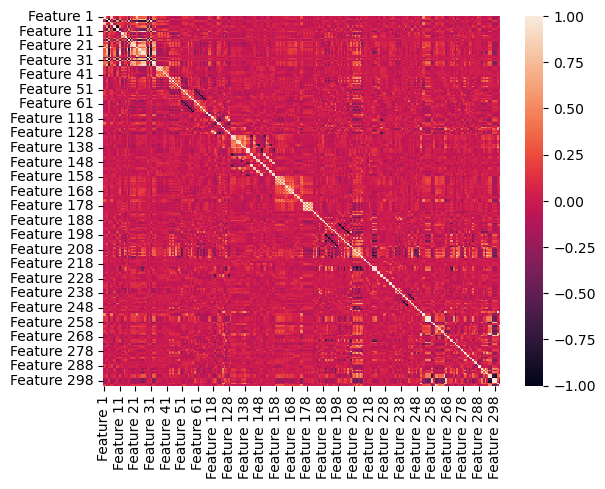

In [17]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [18]:
df_feature.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [19]:
df_feature_train = df_feature[5:]
df_feature_test = df_feature[:5]
df_target_train = df_target[5:]

Feature: 0, Score: 0.00197
Feature: 1, Score: 0.00234
Feature: 2, Score: 0.00193
Feature: 3, Score: 0.00174
Feature: 4, Score: 0.00418
Feature: 5, Score: 0.00515
Feature: 6, Score: 0.00240
Feature: 7, Score: 0.00256
Feature: 8, Score: 0.00175
Feature: 9, Score: 0.00127
Feature: 10, Score: 0.00181
Feature: 11, Score: 0.00144
Feature: 12, Score: 0.00199
Feature: 13, Score: 0.00278
Feature: 14, Score: 0.00255
Feature: 15, Score: 0.00311
Feature: 16, Score: 0.00230
Feature: 17, Score: 0.00192
Feature: 18, Score: 0.00547
Feature: 19, Score: 0.00270
Feature: 20, Score: 0.00164
Feature: 21, Score: 0.00266
Feature: 22, Score: 0.00109
Feature: 23, Score: 0.00100
Feature: 24, Score: 0.00084
Feature: 25, Score: 0.00103
Feature: 26, Score: 0.00121
Feature: 27, Score: 0.00164
Feature: 28, Score: 0.00176
Feature: 29, Score: 0.00057
Feature: 30, Score: 0.00077
Feature: 31, Score: 0.00126
Feature: 32, Score: 0.00202
Feature: 33, Score: 0.00220
Feature: 34, Score: 0.00263
Feature: 35, Score: 0.00344
Fe

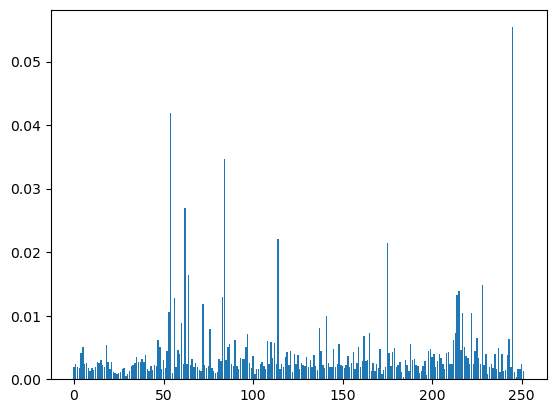

In [20]:
model = RandomForestRegressor()
model.fit(df_feature_train, df_target_train)
sig = model.feature_importances_
for i,v in enumerate(sig):
    print('Feature: %0d, Score: %.5f' %(i,v))
plt.bar([x for x in range(len(sig))], sig)
plt.show()

In [21]:
sig_index = []
for i,v in enumerate(sig):
    if v > 0.01:
        print('Feature: %0d, Score: %.5f' %(i,v))
        sig_index.append(i)

Feature: 53, Score: 0.01063
Feature: 54, Score: 0.04186
Feature: 56, Score: 0.01272
Feature: 62, Score: 0.02688
Feature: 64, Score: 0.01638
Feature: 72, Score: 0.01191
Feature: 83, Score: 0.01298
Feature: 84, Score: 0.03465
Feature: 114, Score: 0.02209
Feature: 175, Score: 0.02137
Feature: 214, Score: 0.01326
Feature: 215, Score: 0.01389
Feature: 217, Score: 0.01038
Feature: 222, Score: 0.01041
Feature: 228, Score: 0.01487
Feature: 245, Score: 0.05539


In [22]:
df_x_train = df_feature_train.iloc[:,sig_index]
df_x_test = df_feature_test.iloc[:,sig_index]
print(df_x_train)

          53        54        56        62        64         72        83   \
5    0.008256  0.075707  0.059920  0.962288  0.973708   8.477603 -0.012892   
6    0.018941  0.074449  0.062366  0.962456  0.972763   8.477603  0.018814   
7    0.003807  0.073353  0.049558  0.964212  0.977090   3.286938 -0.034432   
8    0.000710  0.058018  0.043568  0.972656  0.980058   9.076015 -0.086692   
9    0.017966  0.073154  0.057024  0.962825  0.974886   3.375886  0.059086   
..        ...       ...       ...       ...       ...        ...       ...   
293  0.004819  0.059594  0.062377  0.970120  0.969643  -0.833430  0.007697   
294 -0.005292  0.063501  0.049091  0.967517  0.975893   9.429214 -0.032997   
295  0.018181  0.060209  0.051396  0.969452  0.974688  -0.928321 -0.071335   
296 -0.000587  0.060564  0.045630  0.969383  0.977575  10.081776 -0.078489   
297  0.000824  0.053977  0.045288  0.972822  0.977729   1.096765  0.033454   

          84        114       175       214       215       217

In [23]:
pred_model = RandomForestRegressor(n_estimators=1000)
pred_model.fit(df_x_train, df_target_train)
df_pred = pred_model.predict(df_x_test)
print(df_pred)

[[ 0.01734777 -0.08887421]
 [ 0.00765113  0.01151341]
 [ 0.00456854  0.03477705]
 [ 0.00598968 -0.00406427]
 [ 0.01069327 -0.00401212]]
